In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import os
import json
import numpy as np
import pickle
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import contextily as cx
import folium
from tqdm import trange, tqdm

from polygon_compare import *

In [4]:
# ms house data
ordu_house = os.path.join("data","clipped_house","city_house.pkl")
johannesburg_house = os.path.join("data","clipped_house","Johannesburg_house.pkl")
cairo_house = os.path.join("data","clipped_house","Cairo_house.pkl")
manisa_house = os.path.join("data","clipped_house","Manisa_house.pkl")
adana_house = os.path.join("data","clipped_house","Adana_house.pkl")
trabzon_house = os.path.join("data","clipped_house","Trabzon_house.pkl")

In [5]:
# osm house data
city_osm = os.path.join("data","OSM","city.pkl")


In [6]:
# osmb house data
ordu_osmb = os.path.join("data","OSMB","Ordu.pkl")


In [8]:
df_ms = pickle.load(open(ordu_house,"rb"))
df_osm = pickle.load(open(ordu_osm,"rb"))
df_osmb = pickle.load(open(ordu_osmb,"rb"))

In [9]:
df_osmb = df_osmb.set_crs('EPSG:4326')

In [10]:
df_ms = df_ms.to_crs('EPSG:4326')

In [11]:
df_ms = df_ms[df_ms["area"]>30]
df_ms

,geometry,density,area
66895,"POLYGON ((37.87145 40.98355, 37.87142 40.98357...",1,306.501689
34474,"POLYGON ((37.87751 40.98569, 37.87761 40.98565...",1,127.306240
30161,"POLYGON ((37.87267 40.99013, 37.87268 40.99020...",1,137.759693
90023,"POLYGON ((37.87214 41.00094, 37.87213 41.00097...",1,54.777124
3393,"POLYGON ((37.86799 41.00895, 37.86806 41.00896...",1,31.856089
...,...,...,...
18035709,"POLYGON ((37.89567 40.96168, 37.89573 40.96180...",1,184.276915
18017693,"POLYGON ((37.94008 40.96198, 37.93991 40.96197...",1,308.375871
18041911,"POLYGON ((37.88468 40.96287, 37.88460 40.96287...",1,38.505512
18014246,"POLYGON ((37.95953 40.92272, 37.95953 40.92265...",1,121.105482


In [12]:
df_osm_b = df_osm[df_osm["type"]=="way"]
df_osm_b

,geometry,id,type,category,tags
2773,"POLYGON ((37.89147 40.98321, 37.89170 40.98321...",639352092,way,Accommodation,{'building': 'dormitory'}
2774,"POLYGON ((37.89508 40.96462, 37.89507 40.96464...",676562912,way,Accommodation,{'building': 'residential'}
2775,"POLYGON ((37.89514 40.96437, 37.89513 40.96439...",676562913,way,Accommodation,{'building': 'residential'}
2776,"POLYGON ((37.89472 40.96427, 37.89471 40.96429...",676562914,way,Accommodation,{'building': 'residential'}
2777,"POLYGON ((37.89455 40.96452, 37.89454 40.96454...",676562915,way,Accommodation,{'building': 'residential'}
...,...,...,...,...,...
11707,"POLYGON ((37.89901 40.97719, 37.89893 40.97703...",1074522919,way,Other buildings,{'building': 'yes'}
11708,"POLYGON ((37.89415 40.98233, 37.89432 40.98227...",1074522920,way,Other buildings,{'building': 'yes'}
11709,"POLYGON ((37.89739 40.98265, 37.89739 40.98252...",1074522921,way,Other buildings,{'building': 'yes'}
11710,"POLYGON ((37.87447 40.98493, 37.87501 40.98490...",1075810445,way,Other buildings,"{'building': 'yes', 'name': 'eski valilik bina..."


In [ ]:
cities = [
    # 'Ordu',
    # 'Manisa',
    # 'Adana',
    
    # 'Johannesburg',
    # 'Cairo',
    # 'Trabzon',
]

for c in cities:
    city_osm = os.path.join("data","OSM",f"{c}.pkl")
    df_osm = pickle.load(open(city_osm,"rb"))
    df_osm_b = df_osm[df_osm["type"]=="way"]
    
    city_osmb = os.path.join("data","OSMB",f"{c}.pkl")
    df_osmb = pickle.load(open(city_osmb,"rb"))
    df_osmb = df_osmb.set_crs('EPSG:4326')
    
    print(df_osmb.shape)

    df = compare_geodf(df_osmb, df_osm_b, match_one=True)
    # df.plot()
    df.to_pickle(f'{c}_combined_osm.pkl')

(2025, 14)


<AxesSubplot:>

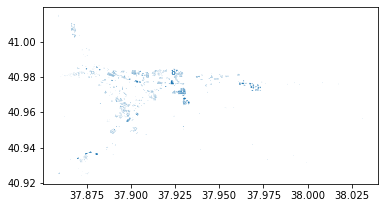

In [41]:
temp = pickle.load(open('Ordu_combined_osm.pkl',"rb"))
print(temp.shape)
temp.plot()

(5960, 10)


<AxesSubplot:>

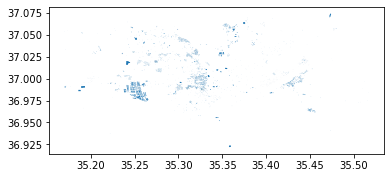

In [27]:
temp = pickle.load(open('Adana_combined_osm.pkl',"rb"))
print(temp.shape)
temp.plot()


(3026, 11)


<AxesSubplot:>

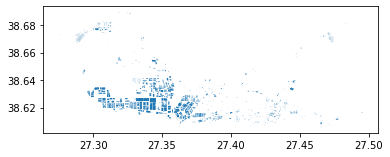

In [30]:
temp = pickle.load(open('Manisa_combined_osm.pkl',"rb"))
print(temp.shape)
temp.plot()

In [48]:
cities = [
    'Ordu',
    # 'Manisa',
    # 'Adana',
    
    # 'Johannesburg',
    # 'Cairo',
    # 'Trabzon',
]

for c in cities:
    city_osm_combined = os.path.join("data","OSM_combined",f"{c}_combined_osm.pkl")
    city_osm_combined = pickle.load(open(city_osm_combined,"rb"))
    
    city_house = os.path.join("data","clipped_house",f"{c}_house.pkl")
    df_ms = pickle.load(open(city_house,"rb"))
    df_ms = df_ms[df_ms["area"]>30]
    df_ms = df_ms.to_crs('EPSG:4326')

    print(city_osm_combined.shape)
    print(df_ms.shape)

    df = compare_geodf(city_osm_combined, df_ms, match_one=False)
    # df.plot()
    df.to_pickle(f'{c}_combined_osm_ms.pkl')
    

(2025, 14)
(18195, 3)


2025it [1:06:24,  1.97s/it][1:06:24<00:00,  2.02s/it]
100%|██████████| 2025/2025 [1:06:24<00:00,  1.97s/it]
18195it [23:07, 13.11it/s]95 [23:07<00:00, 10.51it/s]
100%|██████████| 18195/18195 [23:07<00:00, 13.11it/s]


(20218, 16)


<AxesSubplot:>

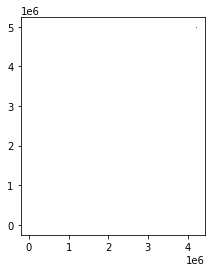

In [49]:
temp = pickle.load(open('Ordu_combined_osm_ms.pkl',"rb"))
print(temp.shape)
temp.plot()

In [55]:
temp

,geometry,orient,height,type,levels,name,roofMaterial,roofShape,roofDirection,roofColor,building,id,category,tags,area,density
0,"POLYGON ((37.859 41.015, 37.859 41.015, 37.859...",57.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"POLYGON ((37.859 41.014, 37.859 41.014, 37.859...",125.0,3.0,religious,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"POLYGON ((37.866 41.008, 37.866 41.008, 37.866...",52.0,3.0,way,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.014055e+09,Other buildings,{'building': 'yes'},NaN,NaN
3,"POLYGON ((37.866 41.007, 37.866 41.007, 37.866...",67.0,3.0,way,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.014055e+09,Other buildings,{'building': 'yes'},NaN,NaN
4,"POLYGON ((37.866 41.007, 37.866 41.007, 37.866...",41.0,3.0,way,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.014055e+09,Other buildings,{'building': 'yes'},NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18035709,"POLYGON ((4218526.383 4978674.158, 4218533.320...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184.276915,1.0
18017693,"POLYGON ((4223470.880 4978717.701, 4223450.942...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,308.375871,1.0
18041911,"POLYGON ((4217303.785 4978848.721, 4217294.539...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.505512,1.0
18014246,"POLYGON ((4225635.634 4972954.029, 4225635.962...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.105482,1.0


In [6]:
df.to_file('ordu_house.shp')

In [ ]:
m = df_osm_b.explore(
    color="green",
    name="OSM"
)

df_osmb.explore(
     m=m,
    column="height",
    name="OSMB"
)

# df_ms.explore(
#      m=m,
#     color="blue",
#     name="MS"
# )

# combined_polygons.explore(
#      m=m,
#     color="red",
#     name="MS2"
# )

folium.TileLayer(control=True).add_to(m)  # use folium to add alternative tiles
folium.LayerControl().add_to(m)  # use folium to add layer control
m